In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
new_data = pd.read_csv('/content/clean_dataset.csv')

# 1. Análise Exploratória de Dados


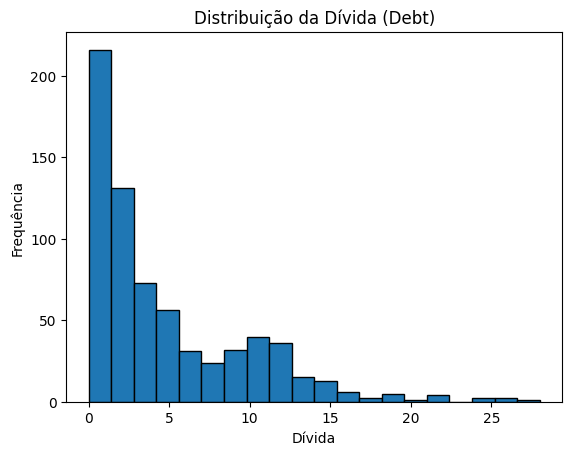

In [3]:
# Distribuição da Dívida (Debt)
plt.hist(new_data['Debt'], bins=20, edgecolor='k')
plt.title('Distribuição da Dívida (Debt)')
plt.xlabel('Dívida')
plt.ylabel('Frequência')
plt.show()

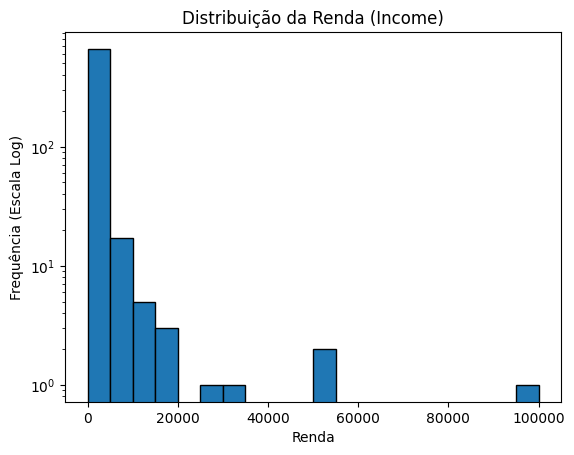

In [4]:
# Distribuição da Renda (Income)
plt.hist(new_data['Income'], bins=20, edgecolor='k', log=True)
plt.title('Distribuição da Renda (Income)')
plt.xlabel('Renda')
plt.ylabel('Frequência (Escala Log)')
plt.show()

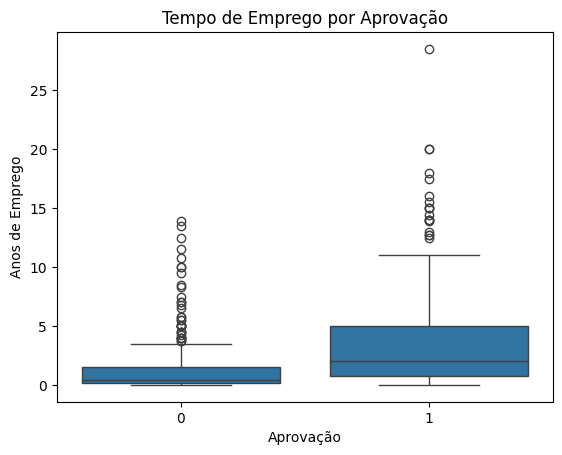

In [5]:
# Boxplot de "YearsEmployed" por Aprovação
sns.boxplot(x='Approved', y='YearsEmployed', data=new_data)
plt.title('Tempo de Emprego por Aprovação')
plt.xlabel('Aprovação')
plt.ylabel('Anos de Emprego')
plt.show()


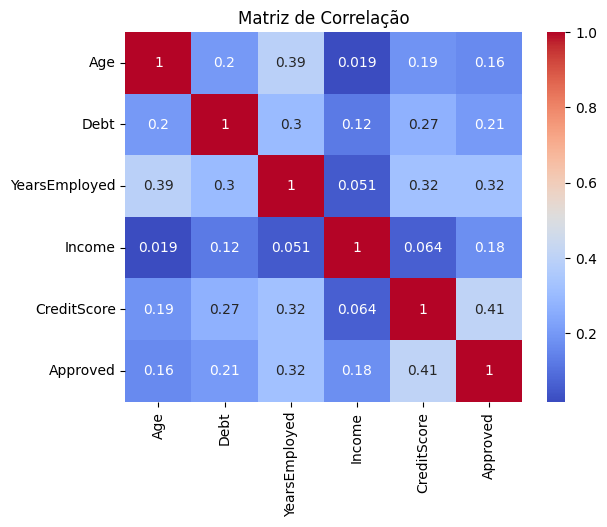

In [6]:
# Matriz de correlação para colunas numéricas relevantes
correlation_data = new_data[['Age', 'Debt', 'YearsEmployed', 'Income', 'CreditScore', 'Approved']]
corr_matrix = correlation_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


# 2. Clusterização com KMeans

In [7]:
# Seleção de features para clusterização
features_cluster = ['Age', 'Debt', 'YearsEmployed', 'Income']
X_cluster = new_data[features_cluster]

In [8]:
# Padronização dos dados
scaler = StandardScaler()
X_scaled_cluster = scaler.fit_transform(X_cluster)

In [9]:
# Redução de dimensionalidade para visualização (PCA)
pca = PCA(n_components=2)
X_pca_cluster = pca.fit_transform(X_scaled_cluster)

In [10]:
# Aplicação do KMeans
kmeans_cluster = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans_cluster.fit_predict(X_scaled_cluster)


In [11]:
# Adicionando os clusters ao DataFrame
new_data['cluster'] = cluster_labels

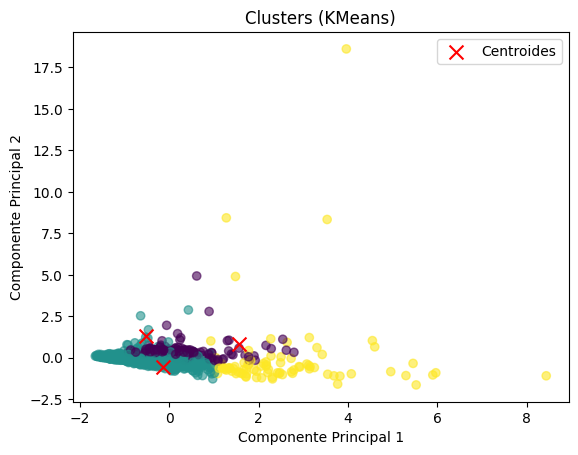

In [12]:
# Visualização dos clusters
plt.scatter(X_pca_cluster[:, 0], X_pca_cluster[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_cluster.cluster_centers_[:, 0], kmeans_cluster.cluster_centers_[:, 1], color='red', marker='x', s=100, label='Centroides')
plt.title('Clusters (KMeans)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


In [13]:
# Exibindo contagem dos clusters
print("Contagem de Clusters (KMeans):")
print(new_data['cluster'].value_counts())

Contagem de Clusters (KMeans):
cluster
1    465
0    139
2     86
Name: count, dtype: int64


# 3. Modelo Supervisionado: Random Forest

In [14]:
# Seleção de features e target para o modelo supervisionado
X_supervised = new_data[['Age', 'Debt', 'YearsEmployed', 'Income', 'CreditScore']]
y_supervised = new_data['Approved']

In [15]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.3, random_state=42)


In [16]:
# Modelo supervisionado: Random Forest
rf_model_supervised = RandomForestClassifier(random_state=42)
rf_model_supervised.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
# Avaliação do modelo
y_pred_supervised = rf_model_supervised.predict(X_test)
classification_rep_supervised = classification_report(y_test, y_pred_supervised)
conf_matrix_supervised = confusion_matrix(y_test, y_pred_supervised)

In [18]:
print("Relatório de Classificação (Random Forest):")
print(classification_rep_supervised)
print("Matriz de Confusão:")
print(conf_matrix_supervised)

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       110
           1       0.73      0.68      0.71        97

    accuracy                           0.73       207
   macro avg       0.73      0.73      0.73       207
weighted avg       0.73      0.73      0.73       207

Matriz de Confusão:
[[86 24]
 [31 66]]


# 4. Clusterização com DBSCAN

In [19]:
# Aplicação do DBSCAN para agrupamento
dbscan_model = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_scaled_cluster)


In [20]:
# Adicionando os labels do DBSCAN ao DataFrame
new_data['dbscan_cluster'] = dbscan_labels

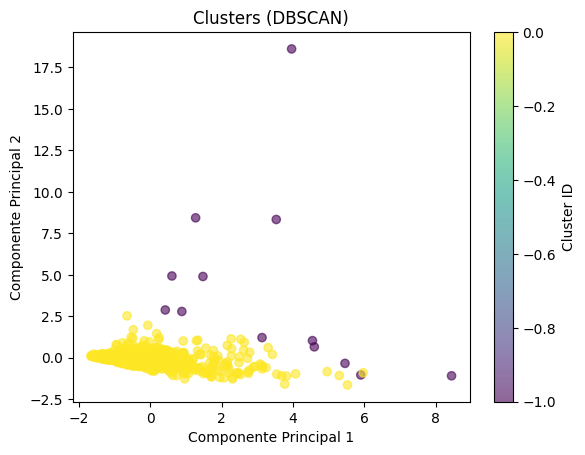

In [21]:
# Visualização dos clusters do DBSCAN
plt.scatter(X_pca_cluster[:, 0], X_pca_cluster[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.title('Clusters (DBSCAN)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster ID')
plt.show()

In [22]:
# Contagem de clusters gerados pelo DBSCAN
print("Contagem de Clusters (DBSCAN):")
print(new_data['dbscan_cluster'].value_counts())

Contagem de Clusters (DBSCAN):
dbscan_cluster
 0    677
-1     13
Name: count, dtype: int64
